In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score


In [3]:
data=pd.read_csv('loan_prediction.csv')


In [4]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# Uni-Variate Analysis


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

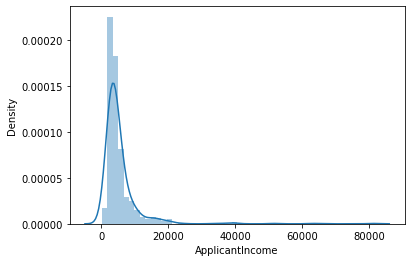

In [11]:
sns.distplot(data.ApplicantIncome)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

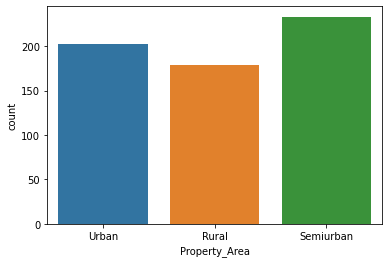

In [12]:
sns.countplot(data.Property_Area)

<AxesSubplot:xlabel='Gender', ylabel='count'>

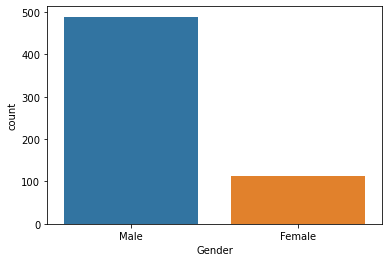

In [13]:
sns.countplot(data.Gender)

<AxesSubplot:xlabel='Education', ylabel='count'>

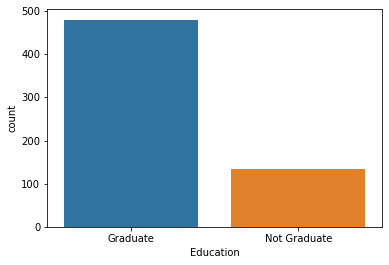

In [14]:
sns.countplot(data.Education)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

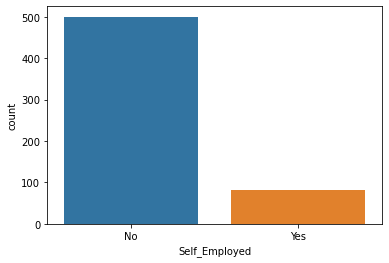

In [15]:
sns.countplot(data.Self_Employed)

<AxesSubplot:xlabel='Married', ylabel='count'>

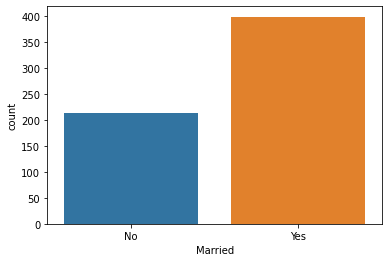

In [16]:
sns.countplot(data.Married)

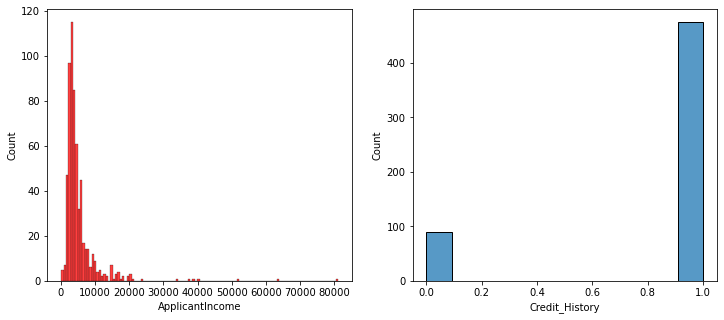

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.histplot(data['Credit_History'])
plt.show()

In [18]:
# Bivariate  Analysis

<AxesSubplot:xlabel='Married', ylabel='count'>

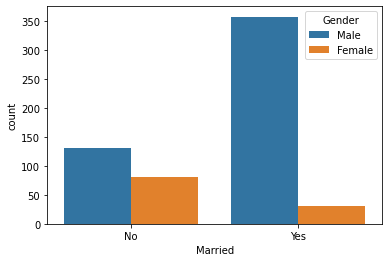

In [19]:
sns.countplot(data['Married'],hue=data['Gender'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

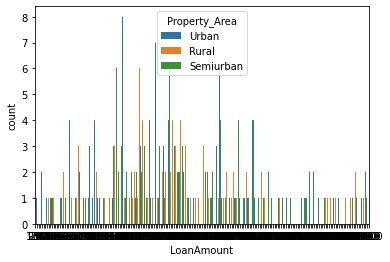

In [20]:
sns.countplot(data['LoanAmount'],hue=data['Property_Area'])

<AxesSubplot:xlabel='Education', ylabel='count'>

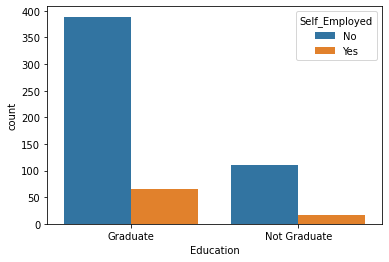

In [21]:
sns.countplot(data['Education'],hue=data['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

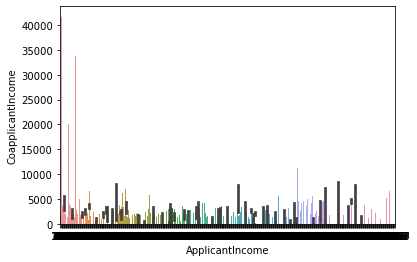

In [22]:
sns.barplot(data.ApplicantIncome,data.CoapplicantIncome)

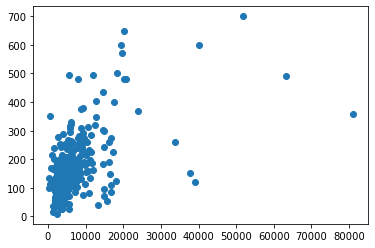

In [23]:
plt.scatter(data.ApplicantIncome,data.LoanAmount)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

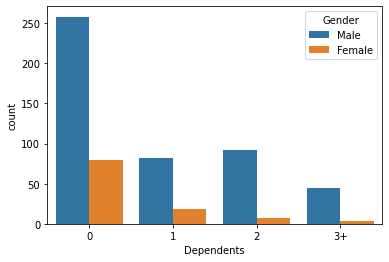

In [24]:
sns.countplot(data['Dependents'],hue=data['Gender'])


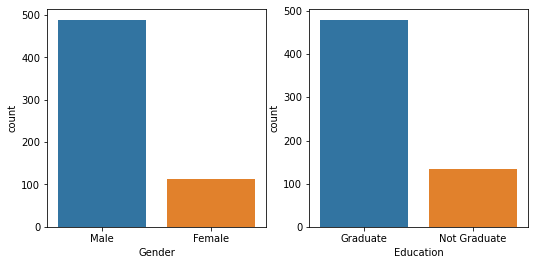

In [25]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

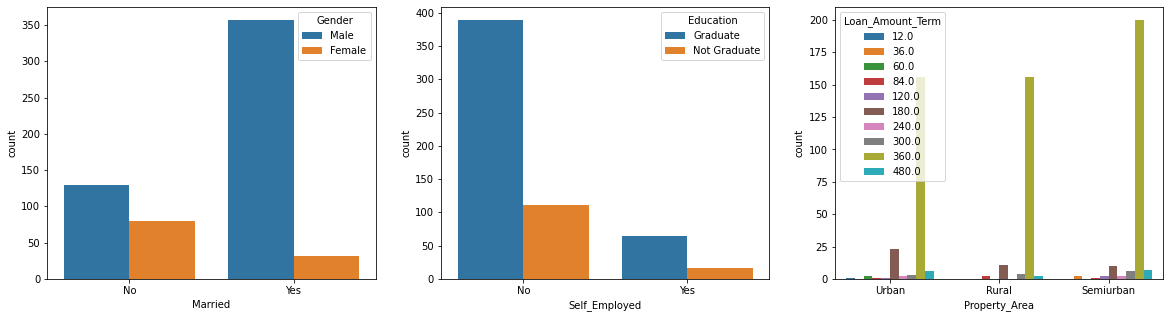

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

In [27]:
# Multivariate Analysis

<AxesSubplot:>

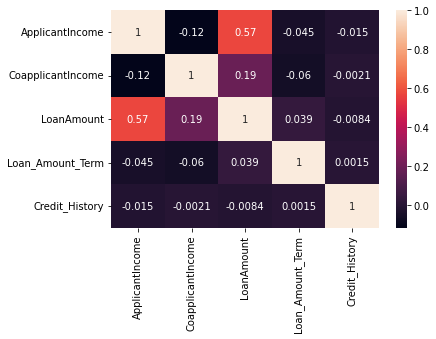

In [28]:
sns.heatmap(data.corr(),annot=True)

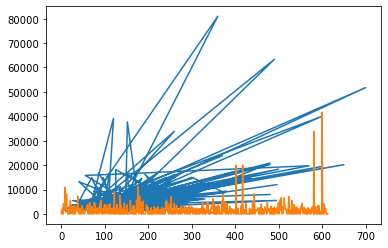

In [29]:
plt.plot(data.LoanAmount,data.ApplicantIncome,data.CoapplicantIncome)

<AxesSubplot:>

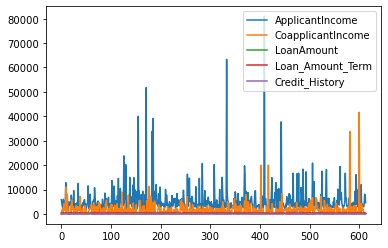

In [30]:
data.plot.line()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

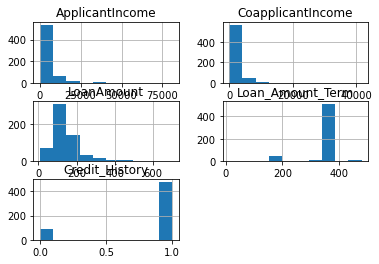

In [31]:
data.hist()

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

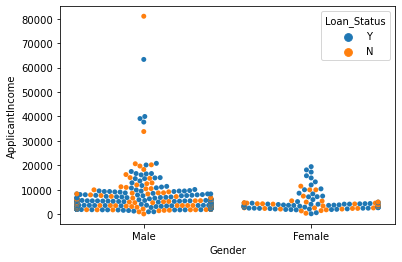

In [32]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue=data['Loan_Status'])

In [33]:
#Descriptive Analysis

In [34]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
#Data Pre-processing
#Checking for Null values

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
#Handling Categorical Values

In [39]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [40]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Married'] = le.fit_transform(data['Married'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Education'] = le.fit_transform(data['Education'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [43]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [44]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    int64 
 2   Married            614 non-null    int64 
 3   Dependents         614 non-null    int64 
 4   Education          614 non-null    int32 
 5   Self_Employed      614 non-null    int64 
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    int32 
 12  Loan_Status        614 non-null    int32 
dtypes: int32(3), int64(9), object(1)
memory usage: 55.3+ KB


In [46]:
#Balancing the datasets

In [47]:
from imblearn.combine import SMOTETomek

In [48]:
smote=SMOTETomek(0.95)

In [49]:
y=data['Loan_Status']
x=data.drop(columns=["Loan_ID",'Loan_Status'],axis=1)
x_bal,y_bal=smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    356
0    334
Name: Loan_Status, dtype: int64


In [50]:
#Scaling the Data

In [51]:
sc=StandardScaler()
x_bal_scaled=sc.fit_transform(x_bal)
x_bal_scaled = pd.DataFrame(x_bal,columns=x.columns)
x_bal_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
685,1,1,1,0,0,4969,0,88,360,0,0
686,1,0,0,0,0,4452,2326,113,360,1,1
687,1,1,1,0,1,10453,3886,166,185,0,1
688,0,0,3,0,0,2239,24411,319,271,1,1


In [52]:
#Processed Data

In [53]:
df=pd.concat([x_bal_scaled,y_bal],axis=1)
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,120,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,1,1,0,0,4969,0,88,360,0,0,0
686,1,0,0,0,0,4452,2326,113,360,1,1,0
687,1,1,1,0,1,10453,3886,166,185,0,1,0
688,0,0,3,0,0,2239,24411,319,271,1,1,0


In [54]:
#Saving into train test datasets

In [55]:
train,test = train_test_split(df, test_size=0.33, random_state=42)

In [56]:
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

In [57]:
#Splitting the data


In [58]:
x=df.drop(["Loan_Status"],axis=1)

In [59]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
685,1,1,1,0,0,4969,0,88,360,0,0
686,1,0,0,0,0,4452,2326,113,360,1,1
687,1,1,1,0,1,10453,3886,166,185,0,1
688,0,0,3,0,0,2239,24411,319,271,1,1


In [60]:
y=df.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Loan_Status, Length: 690, dtype: int32

In [61]:
#Splitting Data Into Train And Test

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [63]:
def decisionTree(x_train,x_test,y_train,y_test):
  dt = DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  pred_test = dt.predict(x_test)
  pred_test
  print('***DecisionTreeClassifier***')
  print('Confusion Matrix')
  print(confusion_matrix(y_test,pred_test))
  print('Classification Report')
  print(classification_report(y_test,pred_test))
  print('Score')
  print(dt.score(x_test,y_test))

In [64]:
decisionTree(x_train,x_test,y_train,y_test)

***DecisionTreeClassifier***
Confusion Matrix
[[51 13]
 [21 53]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        64
           1       0.80      0.72      0.76        74

    accuracy                           0.75       138
   macro avg       0.76      0.76      0.75       138
weighted avg       0.76      0.75      0.75       138

Score
0.7536231884057971


In [65]:
def randomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred_test = rf.predict(x_test)
    print("**** Random Forest Classifier ****")
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred_test))
    print('Classification Report')
    print(classification_report(y_test,pred_test))
    print('Score')
    print(rf.score(x_test,y_test))

In [66]:
randomForest(x_train,x_test,y_train,y_test)

**** Random Forest Classifier ****
Confusion Matrix
[[47 17]
 [ 6 68]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        64
           1       0.80      0.92      0.86        74

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138

Score
0.8333333333333334


In [67]:
def KNN(x_train,x_test,y_train,y_test):
    Knn = KNeighborsClassifier()
    Knn.fit(x_train,y_train)
    pred_test = Knn.predict(x_test)
    print("**** KNeigborsClassifier ****")
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred_test))
    print('Classification Report')
    print(classification_report(y_test,pred_test))
    print('Score')
    print(Knn.score(x_test,y_test))

In [68]:
KNN(x_train,x_test,y_train,y_test)

**** KNeigborsClassifier ****
Confusion Matrix
[[47 17]
 [26 48]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.73      0.69        64
           1       0.74      0.65      0.69        74

    accuracy                           0.69       138
   macro avg       0.69      0.69      0.69       138
weighted avg       0.69      0.69      0.69       138

Score
0.6884057971014492


In [69]:
def xgboost(x_train,x_test,y_train,y_test):
    xg= KNeighborsClassifier()
    xg.fit(x_train,y_train)
    pred_test = xg.predict(x_test)
    print("**** GradientBoostingClassifier****")
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred_test))
    print('Classification Report')
    print(classification_report(y_test,pred_test))
    print("score")
    print(xg.score(x_test,y_test))

In [70]:
xgboost(x_train,x_test,y_train,y_test)

**** GradientBoostingClassifier****
Confusion Matrix
[[47 17]
 [26 48]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.73      0.69        64
           1       0.74      0.65      0.69        74

    accuracy                           0.69       138
   macro avg       0.69      0.69      0.69       138
weighted avg       0.69      0.69      0.69       138

score
0.6884057971014492


In [71]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)

In [72]:
f1_score(pred_test,y_test,average='weighted')

0.8502835538752364

In [73]:
cv=cross_val_score(rf,x,y,cv=5)

In [77]:
np.mean(cv)

0.808695652173913

In [75]:
pickle.dump(rf,open('rdf.pkl','wb'))

In [76]:
pickle.dump(sc,open("scalar.pkl","wb"))